#  Relatório do Trabalho Prático II - Aprendizagem Automática 2020/2021
   - COMPETIÇÃO KAGGLE - Machine Learning                                                                                                

# Importar Bibliotecas

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.metrics import confusion_matrix

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.model_selection import GridSearchCV

from scipy.stats import skew
from scipy import stats
import statsmodels

import warnings
warnings.filterwarnings('ignore')

# Importar Data

In [2]:
train = pd.read_csv("/mnt/c/Users/diogo/OneDrive/Ambiente de Trabalho/AA/Trabalho2/train.csv")
test = pd.read_csv("/mnt/c/Users/diogo/OneDrive/Ambiente de Trabalho/AA/Trabalho2/test.csv")

# Análise do Conjunto de Treino e Teste

In [3]:
train.columns #original columns of train dataset

Index(['Id', 'Program', 'Y0s1_enrol', 'Y0s2_enrol', 'Y1s1_enrol',
       'Y1s1_complete', 'Y1s1_grade', 'Y1s2_enrol', 'Y1s2_complete',
       'Y1s2_grade', 'Y2s1_enrol', 'Y2s1_complete', 'Y2s1_grade', 'Y2s2_enrol',
       'Y2s2_complete', 'Y2s2_grade', 'Y3s1_enrol', 'Y3s1_complete',
       'Y3s1_grade', 'Y3s2_enrol', 'Y3s2_complete', 'Y3s2_grade', 'Y4s1_enrol',
       'Y4s1_complete', 'Y4s1_grade', 'Y4s2_enrol', 'Y4s2_complete',
       'Y4s2_grade', 'Rest_enrol', 'Rest_complete', 'Rest_grade', 'Failure'],
      dtype='object')

In [4]:
test.columns #original columns of test dataset

Index(['Id', 'Program', 'Y0s1_enrol', 'Y0s2_enrol', 'Y1s1_enrol',
       'Y1s1_complete', 'Y1s1_grade', 'Y1s2_enrol', 'Y1s2_complete',
       'Y1s2_grade', 'Y2s1_enrol', 'Y2s1_complete', 'Y2s1_grade', 'Y2s2_enrol',
       'Y2s2_complete', 'Y2s2_grade', 'Y3s1_enrol', 'Y3s1_complete',
       'Y3s1_grade', 'Y3s2_enrol', 'Y3s2_complete', 'Y3s2_grade', 'Y4s1_enrol',
       'Y4s1_complete', 'Y4s1_grade', 'Y4s2_enrol', 'Y4s2_complete',
       'Y4s2_grade', 'Rest_enrol', 'Rest_complete', 'Rest_grade'],
      dtype='object')

* ** Renomeámos as colunas para ficar mais percetivel no trabalho **

In [5]:
test_aux = test.rename(columns={'Program':'Curso','Y0s1_enrol':'N_ECTS_Ano0_Impar', 'Y0s2_enrol':'N_ECTS_Ano0_Par','Y1s1_enrol':'N_ECTS_Ano-1_Impar','Y1s1_complete':'COMPLETED_Ano0_Impar','Y1s1_grade':'MédiaN_Ano0_Impar','Y1s2_enrol':'N_ECTS_Ano-1_Par','Y1s2_complete':'COMPLETED_Ano0_Par','Y1s2_grade':'MédiaN_Ano0_Par','Y2s1_enrol':'N_ECTS_Ano-2_Impar','Y2s1_complete':'COMPLETED_Ano-2_Impar','Y2s1_grade':'MédiaN_Ano-2_Impar','Y2s2_enrol':'N_ECTS_Ano-2_Par','Y2s2_complete':'COMPLETED_Ano-2_Par','Y2s2_grade':'MédiaN_Ano-2_Par','Y3s1_enrol':'N_ECTS_Ano-3_Impar','Y3s1_complete':'COMPLETED_Ano-3_Impar','Y3s1_grade':'MédiaN_Ano-3_Impar','Y3s2_enrol':'N_ECTS_Ano-3_Par','Y3s2_complete':'COMPLETED_Ano-3_Par','Y3s2_grade':'MédiaN_Ano-3_Par','Y4s1_enrol':'N_ECTS_Ano-4_Impar','Y4s1_complete':'COMPLETED_Ano-4_Impar','Y4s1_grade':'MédiaN_Ano-4_Impar','Y4s2_enrol':'N_ECTS_Ano-4_Par','Y4s2_complete':'COMPLETED_Ano-4_Par','Y4s2_grade':'MédiaN_Ano-4_Par','Rest_enrol':'N_ECTS_Resto','Rest_complete':'COMPLETED_Resto','Rest_grade':'MédiaN_Resto'})
new_test = test_aux #new_test with our columns names for test

In [6]:
train_aux = train.rename(columns={'Program':'Curso','Y0s1_enrol':'N_ECTS_Ano0_Impar', 'Y0s2_enrol':'N_ECTS_Ano0_Par','Y1s1_enrol':'N_ECTS_Ano-1_Impar','Y1s1_complete':'COMPLETED_Ano0_Impar','Y1s1_grade':'MédiaN_Ano0_Impar','Y1s2_enrol':'N_ECTS_Ano-1_Par','Y1s2_complete':'COMPLETED_Ano0_Par','Y1s2_grade':'MédiaN_Ano0_Par','Y2s1_enrol':'N_ECTS_Ano-2_Impar','Y2s1_complete':'COMPLETED_Ano-2_Impar','Y2s1_grade':'MédiaN_Ano-2_Impar','Y2s2_enrol':'N_ECTS_Ano-2_Par','Y2s2_complete':'COMPLETED_Ano-2_Par','Y2s2_grade':'MédiaN_Ano-2_Par','Y3s1_enrol':'N_ECTS_Ano-3_Impar','Y3s1_complete':'COMPLETED_Ano-3_Impar','Y3s1_grade':'MédiaN_Ano-3_Impar','Y3s2_enrol':'N_ECTS_Ano-3_Par','Y3s2_complete':'COMPLETED_Ano-3_Par','Y3s2_grade':'MédiaN_Ano-3_Par','Y4s1_enrol':'N_ECTS_Ano-4_Impar','Y4s1_complete':'COMPLETED_Ano-4_Impar','Y4s1_grade':'MédiaN_Ano-4_Impar','Y4s2_enrol':'N_ECTS_Ano-4_Par','Y4s2_complete':'COMPLETED_Ano-4_Par','Y4s2_grade':'MédiaN_Ano-4_Par','Rest_enrol':'N_ECTS_Resto','Rest_complete':'COMPLETED_Resto','Rest_grade':'MédiaN_Resto'})
new_train = train_aux #new_train with our columns names for train

* **Tamanho de linhas e colunas dos nossos conjuntos**

In [7]:
new_train.shape #number of rows and columns of train

(1846, 32)

In [8]:
new_test.shape #number of rows and columns of test

(792, 31)

* **Nomes das colunas, contagens de valores e valores nulos e tipo das instâncias**

In [9]:
new_train.info() #info of train set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     1846 non-null   int64  
 1   Curso                  1846 non-null   object 
 2   N_ECTS_Ano0_Impar      1846 non-null   float64
 3   N_ECTS_Ano0_Par        1846 non-null   float64
 4   N_ECTS_Ano-1_Impar     1846 non-null   float64
 5   COMPLETED_Ano0_Impar   1846 non-null   float64
 6   MédiaN_Ano0_Impar      1846 non-null   float64
 7   N_ECTS_Ano-1_Par       1846 non-null   float64
 8   COMPLETED_Ano0_Par     1846 non-null   float64
 9   MédiaN_Ano0_Par        1846 non-null   float64
 10  N_ECTS_Ano-2_Impar     1846 non-null   float64
 11  COMPLETED_Ano-2_Impar  1846 non-null   float64
 12  MédiaN_Ano-2_Impar     1846 non-null   float64
 13  N_ECTS_Ano-2_Par       1846 non-null   float64
 14  COMPLETED_Ano-2_Par    1846 non-null   float64
 15  Médi

* **Primeiras 5 linhas do conjunto treino**

In [10]:
new_train.head(5) 

,Id,Curso,N_ECTS_Ano0_Impar,N_ECTS_Ano0_Par,N_ECTS_Ano-1_Impar,COMPLETED_Ano0_Impar,MédiaN_Ano0_Impar,N_ECTS_Ano-1_Par,COMPLETED_Ano0_Par,MédiaN_Ano0_Par,...,N_ECTS_Ano-4_Impar,COMPLETED_Ano-4_Impar,MédiaN_Ano-4_Impar,N_ECTS_Ano-4_Par,COMPLETED_Ano-4_Par,MédiaN_Ano-4_Par,N_ECTS_Resto,COMPLETED_Resto,MédiaN_Resto,Failure
0,131386709,Management,46.0,30.0,36.5,36.5,11.452,36.0,36.0,13.236,...,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0
1,111354305,Nursing,30.0,24.0,30.0,30.0,14.933,30.0,30.0,17.333,...,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0
2,111345828,Nursing,30.0,40.0,26.0,26.0,17.000,20.0,10.0,16.000,...,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0
3,131393682,Biology,0.0,6.0,20.0,14.0,12.286,12.0,0.0,0.000,...,28.0,28.0,11.75,42.0,36.0,11.833,0.0,0.0,0.0,0
4,131383677,Informatics,41.0,36.0,36.0,19.0,14.053,48.0,30.0,12.400,...,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0


* **Breve análise do nosso conjunto de treino, onde podemos observar contagem, média, minímo, máximo, etc**

In [11]:
new_train.describe()

,Id,N_ECTS_Ano0_Impar,N_ECTS_Ano0_Par,N_ECTS_Ano-1_Impar,COMPLETED_Ano0_Impar,MédiaN_Ano0_Impar,N_ECTS_Ano-1_Par,COMPLETED_Ano0_Par,MédiaN_Ano0_Par,N_ECTS_Ano-2_Impar,...,N_ECTS_Ano-4_Impar,COMPLETED_Ano-4_Impar,MédiaN_Ano-4_Impar,N_ECTS_Ano-4_Par,COMPLETED_Ano-4_Par,MédiaN_Ano-4_Par,N_ECTS_Resto,COMPLETED_Resto,MédiaN_Resto,Failure
count,1.846000e+03,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,...,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000
mean,1.287298e+08,27.291441,29.136511,25.669827,18.582340,10.459527,28.125948,20.036566,10.827696,23.260022,...,6.377302,3.065547,2.212032,7.072319,3.241062,2.101872,11.913326,3.457476,1.019790,0.270856
std,6.799903e+06,10.693176,13.413551,13.125195,13.017874,6.100924,14.094108,13.309945,6.178580,15.355087,...,13.260614,7.687338,4.852002,14.924990,8.089078,4.728759,50.521613,14.620602,3.458227,0.444522
min,1.113357e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.313826e+08,24.000000,24.000000,24.000000,3.000000,10.000000,27.000000,6.000000,10.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.313870e+08,30.000000,30.000000,30.000000,23.250000,12.700000,30.000000,24.250000,13.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.313924e+08,33.000000,36.000000,34.000000,30.000000,14.733000,36.000000,30.000000,15.019500,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.314154e+08,63.000000,93.000000,90.000000,90.000000,19.000000,90.000000,90.000000,19.400000,102.000000,...,88.000000,36.000000,18.000000,94.000000,59.000000,17.185000,623.500000,159.000000,19.000000,1.000000


* **Além disso, com esta descrição podemos dizer que há 27% do conjunto train que abandona os estudos.**

* **Colunas renomeadas**

In [12]:
new_train.columns.values

array(['Id', 'Curso', 'N_ECTS_Ano0_Impar', 'N_ECTS_Ano0_Par',
       'N_ECTS_Ano-1_Impar', 'COMPLETED_Ano0_Impar', 'MédiaN_Ano0_Impar',
       'N_ECTS_Ano-1_Par', 'COMPLETED_Ano0_Par', 'MédiaN_Ano0_Par',
       'N_ECTS_Ano-2_Impar', 'COMPLETED_Ano-2_Impar',
       'MédiaN_Ano-2_Impar', 'N_ECTS_Ano-2_Par', 'COMPLETED_Ano-2_Par',
       'MédiaN_Ano-2_Par', 'N_ECTS_Ano-3_Impar', 'COMPLETED_Ano-3_Impar',
       'MédiaN_Ano-3_Impar', 'N_ECTS_Ano-3_Par', 'COMPLETED_Ano-3_Par',
       'MédiaN_Ano-3_Par', 'N_ECTS_Ano-4_Impar', 'COMPLETED_Ano-4_Impar',
       'MédiaN_Ano-4_Impar', 'N_ECTS_Ano-4_Par', 'COMPLETED_Ano-4_Par',
       'MédiaN_Ano-4_Par', 'N_ECTS_Resto', 'COMPLETED_Resto',
       'MédiaN_Resto', 'Failure'], dtype=object)

# Análise de Dados

** Id  - O único id, não tem qualque efeito no valor de 'Failure' **


** Failure  - binary: **

* 1 -> Abandona

* 0 -> Alunos que terminaram ou estão ativos (Não abandonaram)


** Curso - Curso do aluno, 1 curso por aluno; **

* 1 -> Biology

* 2 -> Nursing 

* 3 -> Management

* 4 -> Informatics

<AxesSubplot:>

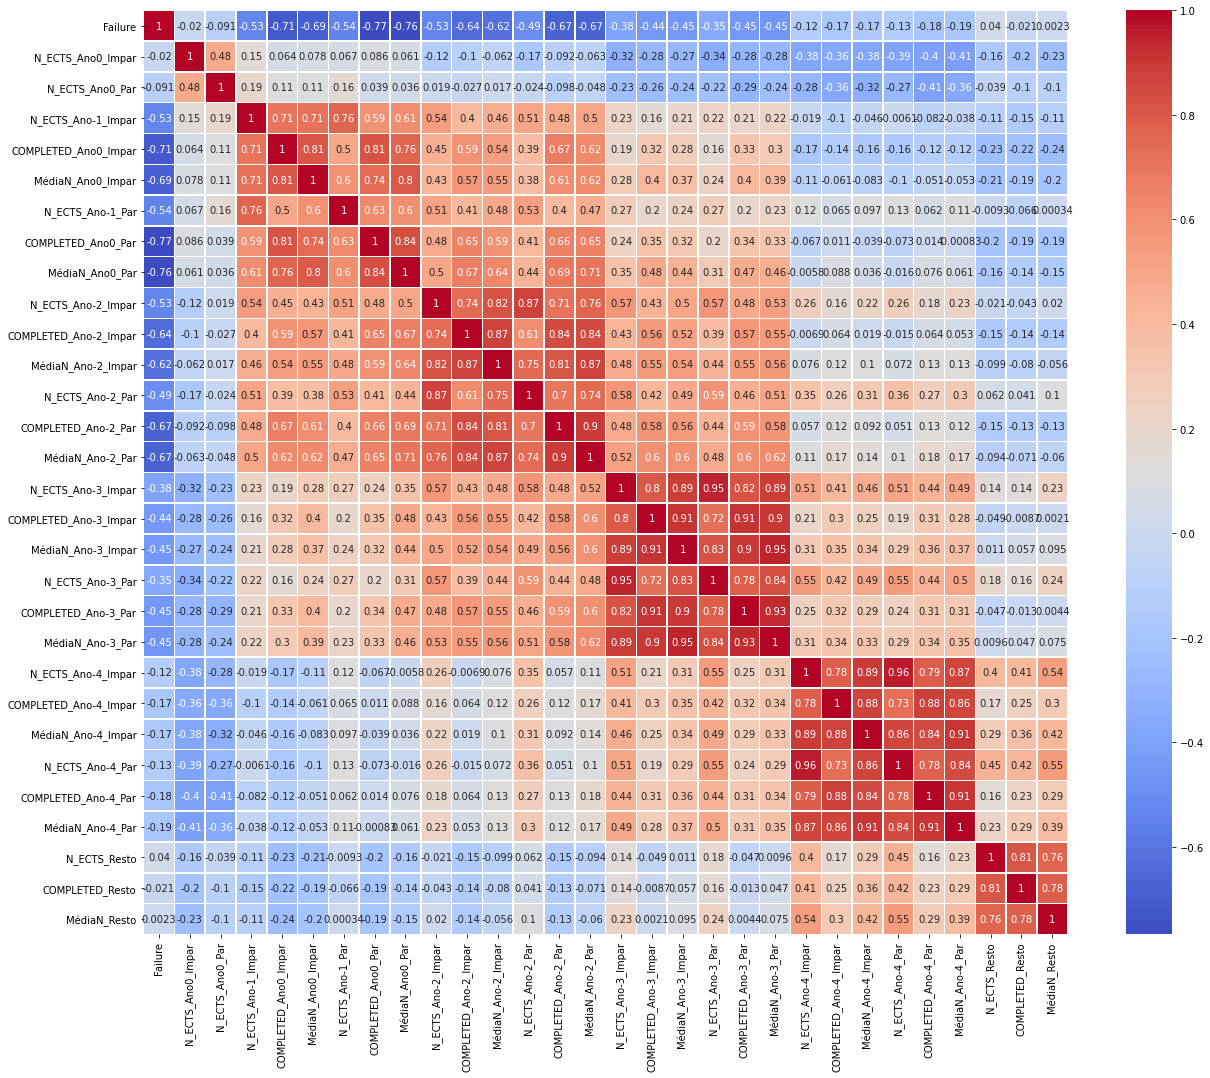

In [13]:
#HEATMAP FOR NUMERICAL VALUES

plt.figure(figsize=(21,17))
sns.heatmap(new_train[["Failure", "N_ECTS_Ano0_Impar", "N_ECTS_Ano0_Par", "N_ECTS_Ano-1_Impar", "COMPLETED_Ano0_Impar", "MédiaN_Ano0_Impar", "N_ECTS_Ano-1_Par", "COMPLETED_Ano0_Par", "MédiaN_Ano0_Par", "N_ECTS_Ano-2_Impar", "COMPLETED_Ano-2_Impar" , "MédiaN_Ano-2_Impar", "N_ECTS_Ano-2_Par" ,"COMPLETED_Ano-2_Par","MédiaN_Ano-2_Par","N_ECTS_Ano-3_Impar","COMPLETED_Ano-3_Impar","MédiaN_Ano-3_Impar","N_ECTS_Ano-3_Par","COMPLETED_Ano-3_Par","MédiaN_Ano-3_Par","N_ECTS_Ano-4_Impar","COMPLETED_Ano-4_Impar","MédiaN_Ano-4_Impar","N_ECTS_Ano-4_Par","COMPLETED_Ano-4_Par","MédiaN_Ano-4_Par", "N_ECTS_Resto", "COMPLETED_Resto","MédiaN_Resto"]].corr(),linewidths=0.5,vmax=1.0, 
            square=True, cmap = "coolwarm", linecolor='white', annot=True)

In [14]:
def comparing(data,variable1, variable2): #To compare features
    print(data[[variable1, variable2]][data[variable2].isnull()==False].groupby([variable1], as_index=False).mean().sort_values(by=variable2, ascending=False))
    g = sns.FacetGrid(data, col=variable2).map(sns.distplot, variable1)

In [15]:
new_train2 = new_train.copy()

   Management   Failure
1           1  0.383302
0           0  0.225929


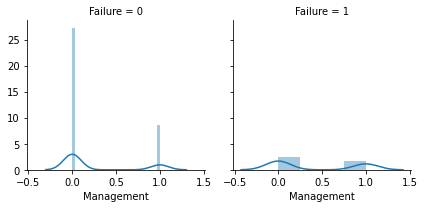

In [16]:
new_train2['Management'] = np.where(new_train2.Curso=='Management',1,0)

comparing(new_train2, 'Management','Failure')

   Nursing   Failure
0        0  0.348746
1        1  0.096491


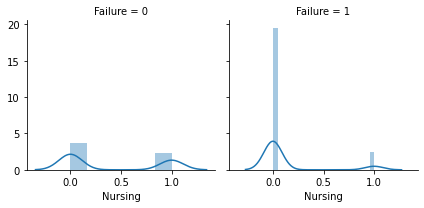

In [17]:
new_train2['Nursing'] = np.where(new_train2.Curso=='Nursing',1,0)

comparing(new_train2, 'Nursing','Failure')

   Biology   Failure
1        1  0.296703
0        0  0.264507


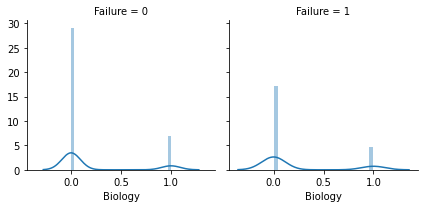

In [18]:
new_train2['Biology'] = np.where(new_train2.Curso=='Biology',1,0)

comparing(new_train2, 'Biology','Failure')

   Informatics   Failure
1            1  0.350649
0            0  0.249829


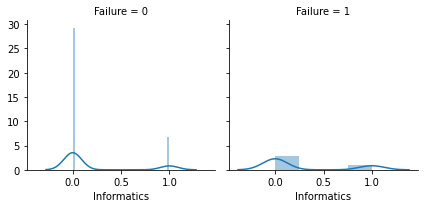

In [19]:
new_train2['Informatics'] = np.where(new_train2.Curso=='Informatics',1,0)

comparing(new_train2, 'Informatics','Failure')

In [20]:
def counting_values(data, variable1, variable2):
    return data[[variable1, variable2]][data[variable2].isnull()==False].groupby([variable1], as_index=False).mean().sort_values(by=variable2, ascending=False)

In [21]:
counting_values(new_train2, 'Curso','Failure')

,Curso,Failure
2,Management,0.383302
1,Informatics,0.350649
0,Biology,0.296703
3,Nursing,0.096491


* ** VERIFICAR SE FALTAM VALORES **

In [22]:
new_train.isnull().sum()

Id                       0
Curso                    0
N_ECTS_Ano0_Impar        0
N_ECTS_Ano0_Par          0
N_ECTS_Ano-1_Impar       0
COMPLETED_Ano0_Impar     0
MédiaN_Ano0_Impar        0
N_ECTS_Ano-1_Par         0
COMPLETED_Ano0_Par       0
MédiaN_Ano0_Par          0
N_ECTS_Ano-2_Impar       0
COMPLETED_Ano-2_Impar    0
MédiaN_Ano-2_Impar       0
N_ECTS_Ano-2_Par         0
COMPLETED_Ano-2_Par      0
MédiaN_Ano-2_Par         0
N_ECTS_Ano-3_Impar       0
COMPLETED_Ano-3_Impar    0
MédiaN_Ano-3_Impar       0
N_ECTS_Ano-3_Par         0
COMPLETED_Ano-3_Par      0
MédiaN_Ano-3_Par         0
N_ECTS_Ano-4_Impar       0
COMPLETED_Ano-4_Impar    0
MédiaN_Ano-4_Impar       0
N_ECTS_Ano-4_Par         0
COMPLETED_Ano-4_Par      0
MédiaN_Ano-4_Par         0
N_ECTS_Resto             0
COMPLETED_Resto          0
MédiaN_Resto             0
Failure                  0
dtype: int64

<AxesSubplot:>

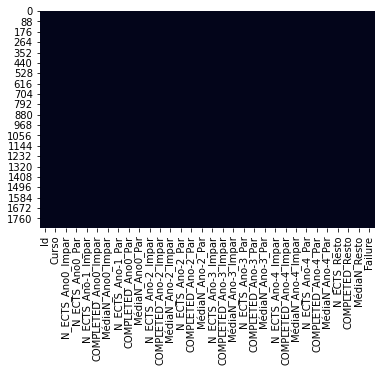

In [23]:
sns.heatmap(new_train.isnull(),cbar=False) #But we know that data is clean and read to a analyze

** Percentagem de alunos que abandonaram e não abandonaram os estudos **

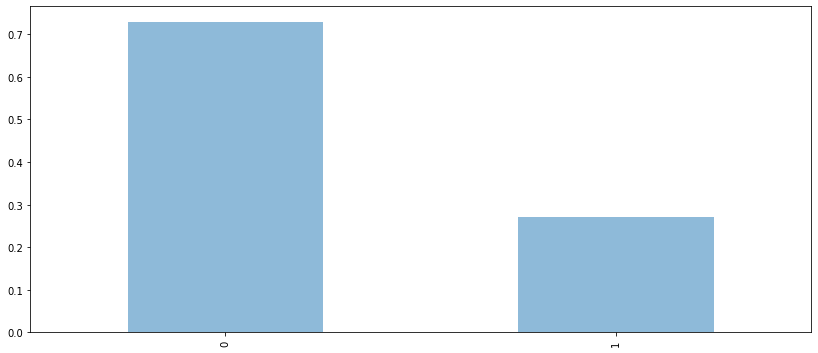

In [24]:
# %70 not dropout %30 dropout

fig = plt.figure(figsize=(14,6))
new_train.Failure.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.show()

** Percentagem de alunos por curso **

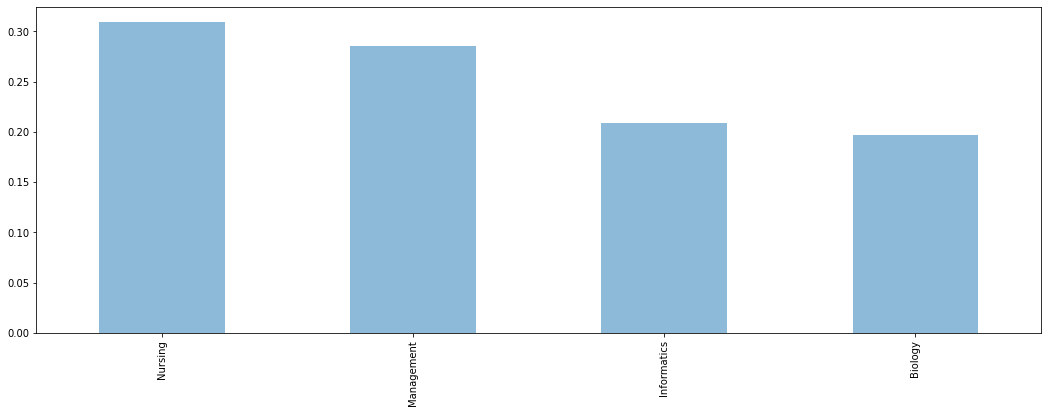

In [25]:
#count of students (%)

fig = plt.figure(figsize=(18,6))
new_train.Curso.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.show()

* **Mudámos de tipo string para para int a identificação do cruso.**

In [26]:
# Change to categoric column to numeric in train and test for modeling

new_train.loc[new_train['Curso']=='Biology','Curso']=1
new_train.loc[new_train['Curso']=='Management','Curso']=2
new_train.loc[new_train['Curso']=='Nursing','Curso']=3
new_train.loc[new_train['Curso']=='Informatics','Curso']=3


new_test.loc[new_test['Curso']=='Biology','Curso']=1
new_test.loc[new_test['Curso']=='Management','Curso']=2
new_test.loc[new_test['Curso']=='Nursing','Curso']=3
new_test.loc[new_test['Curso']=='Informatics','Curso']=3

# Construção do Modelo

In [27]:
new_train = new_train.drop('Id', 1)

In [28]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Curso                  1846 non-null   object 
 1   N_ECTS_Ano0_Impar      1846 non-null   float64
 2   N_ECTS_Ano0_Par        1846 non-null   float64
 3   N_ECTS_Ano-1_Impar     1846 non-null   float64
 4   COMPLETED_Ano0_Impar   1846 non-null   float64
 5   MédiaN_Ano0_Impar      1846 non-null   float64
 6   N_ECTS_Ano-1_Par       1846 non-null   float64
 7   COMPLETED_Ano0_Par     1846 non-null   float64
 8   MédiaN_Ano0_Par        1846 non-null   float64
 9   N_ECTS_Ano-2_Impar     1846 non-null   float64
 10  COMPLETED_Ano-2_Impar  1846 non-null   float64
 11  MédiaN_Ano-2_Impar     1846 non-null   float64
 12  N_ECTS_Ano-2_Par       1846 non-null   float64
 13  COMPLETED_Ano-2_Par    1846 non-null   float64
 14  MédiaN_Ano-2_Par       1846 non-null   float64
 15  N_EC

* **Convertemos o valor das médias de float para int para que seja mais fácil e haja uma melhor previsão dos dados**

In [29]:
data = [new_train, new_test]

for dataset in data:
    dataset['N_ECTS_Ano0_Impar'] = dataset['N_ECTS_Ano0_Impar'].astype(int)
    dataset['N_ECTS_Ano0_Par'] = dataset['N_ECTS_Ano0_Par'].astype(int)
    dataset['N_ECTS_Ano-1_Impar'] = dataset['N_ECTS_Ano-1_Impar'].astype(int)
    dataset['COMPLETED_Ano0_Impar'] = dataset['COMPLETED_Ano0_Impar'].astype(int)

    dataset['N_ECTS_Ano-1_Par'] = dataset['N_ECTS_Ano-1_Par'].astype(int)
    dataset['COMPLETED_Ano0_Par'] = dataset['COMPLETED_Ano0_Par'].astype(int)

    dataset['N_ECTS_Ano-2_Impar'] = dataset['N_ECTS_Ano-2_Impar'].astype(int)
    dataset['COMPLETED_Ano-2_Impar'] = dataset['COMPLETED_Ano-2_Impar'].astype(int)

    dataset['N_ECTS_Ano-2_Par'] = dataset['N_ECTS_Ano-2_Par'].astype(int)
    dataset['COMPLETED_Ano-2_Par'] = dataset['COMPLETED_Ano-2_Par'].astype(int)

    dataset['N_ECTS_Ano-3_Impar'] = dataset['N_ECTS_Ano-3_Impar'].astype(int)
    dataset['COMPLETED_Ano-3_Impar'] = dataset['COMPLETED_Ano-3_Impar'].astype(int)

    dataset['N_ECTS_Ano-3_Par'] = dataset['N_ECTS_Ano-3_Par'].astype(int)
    dataset['COMPLETED_Ano-3_Par'] = dataset['COMPLETED_Ano-3_Par'].astype(int)

    dataset['N_ECTS_Ano-4_Impar'] = dataset['N_ECTS_Ano-4_Impar'].astype(int)
    dataset['COMPLETED_Ano-4_Impar'] = dataset['COMPLETED_Ano-4_Impar'].astype(int)

    dataset['N_ECTS_Ano-4_Par'] = dataset['N_ECTS_Ano-4_Par'].astype(int)
    dataset['COMPLETED_Ano-4_Par'] = dataset['COMPLETED_Ano-4_Par'].astype(int)

    dataset['N_ECTS_Resto'] = dataset['N_ECTS_Resto'].astype(int)
    dataset['COMPLETED_Resto'] = dataset['COMPLETED_Resto'].astype(int)

    


* Tipos ** float ** convertidos a ** int ** /excepto média.

In [30]:
new_train.info() #tipos float convertidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Curso                  1846 non-null   object 
 1   N_ECTS_Ano0_Impar      1846 non-null   int64  
 2   N_ECTS_Ano0_Par        1846 non-null   int64  
 3   N_ECTS_Ano-1_Impar     1846 non-null   int64  
 4   COMPLETED_Ano0_Impar   1846 non-null   int64  
 5   MédiaN_Ano0_Impar      1846 non-null   float64
 6   N_ECTS_Ano-1_Par       1846 non-null   int64  
 7   COMPLETED_Ano0_Par     1846 non-null   int64  
 8   MédiaN_Ano0_Par        1846 non-null   float64
 9   N_ECTS_Ano-2_Impar     1846 non-null   int64  
 10  COMPLETED_Ano-2_Impar  1846 non-null   int64  
 11  MédiaN_Ano-2_Impar     1846 non-null   float64
 12  N_ECTS_Ano-2_Par       1846 non-null   int64  
 13  COMPLETED_Ano-2_Par    1846 non-null   int64  
 14  MédiaN_Ano-2_Par       1846 non-null   float64
 15  N_EC

In [31]:
#Creating X and y

X = new_train.drop(['Failure'], 1) 
Y_train = new_train['Failure']
X_test = new_test.drop('Id', 1)

* Qual o modelo que apresenta melhor accuracy para o nosso problema?

** Random Forest: **

In [32]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X, Y_train)

acc_random_forest = round(random_forest.score(X, Y_train) * 100, 2)

** Logistic Regression: **

In [33]:
logreg = LogisticRegression()

logreg.fit(X, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X, Y_train) * 100, 2)

** K Nearest Neighbor: **

In [34]:
knn = KNeighborsClassifier(n_neighbors = 3) 

knn.fit(X, Y_train)  

Y_pred = knn.predict(X_test)  

acc_knn = round(knn.score(X, Y_train) * 100, 2)

** Linear Support Vector Machine: **

In [35]:
linear_svc = LinearSVC()

linear_svc.fit(X, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X, Y_train) * 100, 2)

** Decision Tree: **

In [36]:
decision_tree = DecisionTreeClassifier() 

decision_tree.fit(X, Y_train)  

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X, Y_train) * 100, 2)

* Resultados da seleção do melhor modelo:

In [37]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_decision_tree]})

result_df = results.sort_values(by='Score', ascending=False)

result_df = result_df.set_index('Score')

result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
96.26,KNN
93.99,Support Vector Machines
93.93,Logistic Regression


** K-Fold Cross Validation no modelo RANDOM FOREST (K = 10) **

In [38]:
from sklearn.model_selection import cross_val_score

rforest = RandomForestClassifier(n_estimators=100)

scores = cross_val_score(rforest, X, Y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())

Scores: [0.96756757 0.95135135 0.92972973 0.96216216 0.94594595 0.93513514
 0.9076087  0.96195652 0.95108696 0.91304348]
Mean: 0.9425587544065804


In [39]:
new_train = new_train.drop(['Failure'], 1)

importances = pd.DataFrame({'feature':new_train.columns,'importance':np.round(random_forest.feature_importances_,3)})

importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances.head(15)


,importance
feature,
COMPLETED_Ano0_Par,0.200
COMPLETED_Ano0_Impar,0.106
MédiaN_Ano0_Par,0.102
COMPLETED_Ano-2_Par,0.095
N_ECTS_Ano-1_Par,0.054
MédiaN_Ano0_Impar,0.053
COMPLETED_Ano-2_Impar,0.046
MédiaN_Ano-2_Par,0.044
MédiaN_Ano-2_Impar,0.033


<AxesSubplot:xlabel='feature'>

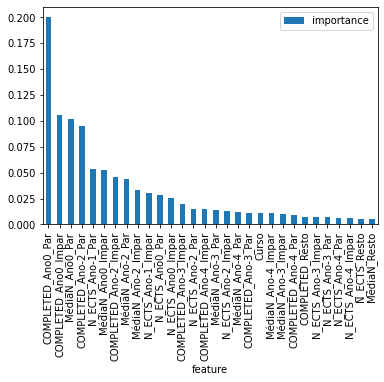

In [40]:
importances.plot.bar()

In [41]:
X_train = new_train
        
X_test = new_test.drop(['Id'], 1)

In [42]:
#Scaling features

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedKFold, KFold


std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

K_fold = StratifiedKFold(n_splits=10)

# Desempenho e Setup dos 5 melhores modelos

** KNN **

* Grid Search CV

In [43]:
""" 

from sklearn.neighbors import KNeighborsClassifier #KNN

n_neighbors = [6,7,8,9,10,11,12,14,16,18,20,22]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = list(range(1,50,5))
hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}

gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, verbose=True, 
                cv=K_fold, scoring = "accuracy")

gd.fit(X_train, Y_train)

print(gd.best_score_)

print(gd.best_estimator_)

"""

' \n\nfrom sklearn.neighbors import KNeighborsClassifier #KNN\n\nn_neighbors = [6,7,8,9,10,11,12,14,16,18,20,22]\nalgorithm = [\'auto\']\nweights = [\'uniform\', \'distance\']\nleaf_size = list(range(1,50,5))\nhyperparams = {\'algorithm\': algorithm, \'weights\': weights, \'leaf_size\': leaf_size, \n               \'n_neighbors\': n_neighbors}\n\ngd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, verbose=True, \n                cv=K_fold, scoring = "accuracy")\n\ngd.fit(X_train, Y_train)\n\nprint(gd.best_score_)\n\nprint(gd.best_estimator_)\n\n'

In [44]:
"""
#Using a model found by grid searching

gd.best_estimator_.fit(X_train, Y_train) 

y_pred = gd.best_estimator_.predict(X_test)

"""

'\n#Using a model found by grid searching\n\ngd.best_estimator_.fit(X_train, Y_train) \n\ny_pred = gd.best_estimator_.predict(X_test)\n\n'

* Com outro valor K

In [45]:
from sklearn.neighbors import KNeighborsClassifier #KNN

knn = KNeighborsClassifier(leaf_size=1, n_neighbors=6, weights='distance')

knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)

** LOGISTIC REGRESSION **

* Grid Search CV

In [46]:
"""

from sklearn.linear_model import LogisticRegression  #Logistic Regression


C = [0.001, 0.01, 0.1, 1.]

penalty = ["l1", "l2"]

hyperparams = {'C': C, 'penalty': penalty}

gd=GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams, verbose=True, 
                cv=K_fold, scoring = "accuracy")

gd.fit(X_train, Y_train)

print(gd.best_score_)

print(gd.best_estimator_)

"""

'\n\nfrom sklearn.linear_model import LogisticRegression  #Logistic Regression\n\n\nC = [0.001, 0.01, 0.1, 1.]\n\npenalty = ["l1", "l2"]\n\nhyperparams = {\'C\': C, \'penalty\': penalty}\n\ngd=GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams, verbose=True, \n                cv=K_fold, scoring = "accuracy")\n\ngd.fit(X_train, Y_train)\n\nprint(gd.best_score_)\n\nprint(gd.best_estimator_)\n\n'

In [47]:
"""
#Using a model found by grid searching

gd.best_estimator_.fit(X_train, Y_train)

y_pred = gd.best_estimator_.predict(X_test)

"""

'\n#Using a model found by grid searching\n\ngd.best_estimator_.fit(X_train, Y_train)\n\ny_pred = gd.best_estimator_.predict(X_test)\n\n'

* Para testar alguns parametros e otimizar o modelo

In [48]:
from sklearn import linear_model

classifier = linear_model.LogisticRegression()

classifier_ = classifier.fit(X_train, Y_train)

y_pred_log=classifier_.predict(X_test)

** RANDOM FOREST **

* Grid Search CV

In [49]:
"""
from sklearn.ensemble import RandomForestClassifier
        
hyperparams = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30,100,1000],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
               
gd=GridSearchCV(estimator=RandomForestClassifier(), param_grid = hyperparams, scoring='accuracy', cv=K_fold, verbose=True, n_jobs=-1)

gd.fit(X_train, Y_train)

print(gd.best_score_)

print(gd.best_estimator_)
"""

#0.95833 (highest score) with this parameteres RandomForestClassifier(criterion='entropy', min_samples_split=4, n_estimators=1000, n_jobs=-1, oob_score=True, random_state=1)

"\nfrom sklearn.ensemble import RandomForestClassifier\n        \nhyperparams = {'criterion':['gini','entropy'],\n          'n_estimators':[10,15,20,25,30,100,1000],\n          'min_samples_leaf':[1,2,3],\n          'min_samples_split':[3,4,5,6,7], \n          'random_state':[123],\n          'n_jobs':[-1]}\n               \ngd=GridSearchCV(estimator=RandomForestClassifier(), param_grid = hyperparams, scoring='accuracy', cv=K_fold, verbose=True, n_jobs=-1)\n\ngd.fit(X_train, Y_train)\n\nprint(gd.best_score_)\n\nprint(gd.best_estimator_)\n"

In [50]:
"""
#Using a model found by grid searching

gd.best_estimator_.fit(X_train, Y_train)

y_pred = gd.best_estimator_.predict(X_test)

"""

'\n#Using a model found by grid searching\n\ngd.best_estimator_.fit(X_train, Y_train)\n\ny_pred = gd.best_estimator_.predict(X_test)\n\n'

* Para testar diferentes parametros

In [51]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(criterion='entropy', min_samples_split=4, n_estimators=1000, n_jobs=-1, oob_score=True, random_state=1)
                  
classifier_ = classifier.fit(X_train ,Y_train)

y_pred_rf = classifier_.predict(X_test)

** DECISION TREE CLASSIFIER **

* Grid Search CV

In [52]:
"""

from sklearn.tree import DecisionTreeClassifier


hyperparams = {'max_features': ['auto', 'sqrt', 'log2'],
               'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
               'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
               'random_state':[123] }

gd=GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = hyperparams, verbose=True, 
                cv=K_fold, scoring = "accuracy")

gd.fit(X_train, Y_train)

print(gd.best_score_)

print(gd.best_estimator_)

"""

'\n\nfrom sklearn.tree import DecisionTreeClassifier\n\n\nhyperparams = {\'max_features\': [\'auto\', \'sqrt\', \'log2\'],\n               \'min_samples_split\': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], \n               \'min_samples_leaf\':[1,2,3,4,5,6,7,8,9,10,11],\n               \'random_state\':[123] }\n\ngd=GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = hyperparams, verbose=True, \n                cv=K_fold, scoring = "accuracy")\n\ngd.fit(X_train, Y_train)\n\nprint(gd.best_score_)\n\nprint(gd.best_estimator_)\n\n'

In [53]:
"""

#Using a model found by grid searching

gd.best_estimator_.fit(X_train, Y_train)

y_pred = gd.best_estimator_.predict(X_test)

"""

'\n\n#Using a model found by grid searching\n\ngd.best_estimator_.fit(X_train, Y_train)\n\ny_pred = gd.best_estimator_.predict(X_test)\n\n'

* Para mudar alguns parametros no algoritmo

In [54]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier_ = classifier.fit(X_train,Y_train)

y_pred_dtc = classifier_.predict(X_test)

** SVM **

* Grid Search CV

In [55]:
"""

from sklearn.svm import SVC, LinearSVC

SVMC = SVC(probability=True)

svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200, 300]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = K_fold,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

"""

'\n\nfrom sklearn.svm import SVC, LinearSVC\n\nSVMC = SVC(probability=True)\n\nsvc_param_grid = {\'kernel\': [\'rbf\'], \n                  \'gamma\': [0.0001, 0.001, 0.01, 0.1, 1],\n                  \'C\': [1, 10, 50, 100, 200, 300]}\n\ngsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = K_fold,\n                      scoring="accuracy", n_jobs= -1, verbose = 1)\n\ngsSVMC.fit(X_train,Y_train)\n\nSVMC_best = gsSVMC.best_estimator_\n\n# Best score\ngsSVMC.best_score_\n\n'

In [56]:
"""
#Using a model found by grid searching

SVMC_best.fit(X_train, Y_train)

y_pred = SVMC_best.predict(X_test)

"""

'\n#Using a model found by grid searching\n\nSVMC_best.fit(X_train, Y_train)\n\ny_pred = SVMC_best.predict(X_test)\n\n'

* Para testar diferentes valores nos parâmetros

In [57]:
from sklearn.svm import SVC, LinearSVC

model = SVC()

model.fit(X_train, Y_train)

y_pred_svm = model.predict(X_test)

** SUBMISSION ** 

In [58]:

temp = pd.DataFrame(test['Id'])

temp['Failure'] = y_pred_rf #change y_pred to predict correct algorithm

temp.to_csv("submission.csv", index = False)


# Discussão e Resultados

Concluindo, após diversas análises e testes a diferentes algoritmos com diferentes parâmetros, o algoritmo ** Random Forest ** foi o que apresentou os melhores resultados. 

Porém, infelizmente não se conseguiu alcançar um score maior que 0.95833 na Leaderboard da competição no Kaggle provavelmente devido a erros ou "más" previsões ou utilizações do modelo.

Contudo, ainda se alcançou um score bastante aceitável para o primeiro impacto com a plataforma Kaggle e este tipo de competições.

Sem dúvida, o kaggle permite competir e tornar mais interessante a construção deste tipo de modelo.